In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split

In [4]:
#Read Dataset using Pandas
data = pd.read_csv('shuffled-full-set-hashed.csv')

In [5]:
#Create dataframe with column names
df = pd.DataFrame(data.values, columns=['label','doc'])

In [6]:
#Count NA for each column in the dataset
df.isna().sum()

label     0
doc      45
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62158 entries, 0 to 62202
Data columns (total 2 columns):
label    62158 non-null object
doc      62158 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


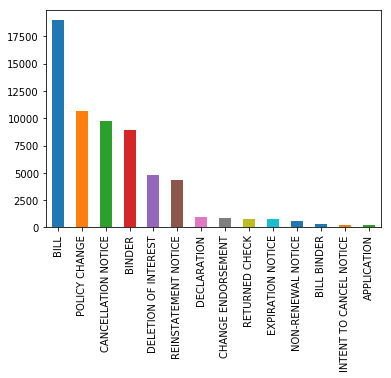

In [13]:
df.info()
pd.value_counts(df['label']).plot.bar()

In [8]:
#Remove Na records from the dataset
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62158 entries, 0 to 62202
Data columns (total 2 columns):
label    62158 non-null object
doc      62158 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [10]:
df['label'].value_counts()

BILL                       18959
POLICY CHANGE              10616
CANCELLATION NOTICE         9729
BINDER                      8952
DELETION OF INTEREST        4825
REINSTATEMENT NOTICE        4367
DECLARATION                  967
CHANGE ENDORSEMENT           889
RETURNED CHECK               749
EXPIRATION NOTICE            734
NON-RENEWAL NOTICE           624
BILL BINDER                  289
INTENT TO CANCEL NOTICE      229
APPLICATION                  229
Name: label, dtype: int64

In [11]:
#Describe the Dataset
df.describe()

,label,doc
count,62158,62158
unique,14,60175
top,BILL,bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...
freq,18959,11


In [12]:
df.describe().transpose()

,count,unique,top,freq
label,62158,14,BILL,18959
doc,62158,60175,bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...,11


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [15]:
le.classes_

array(['APPLICATION', 'BILL', 'BILL BINDER', 'BINDER',
       'CANCELLATION NOTICE', 'CHANGE ENDORSEMENT', 'DECLARATION',
       'DELETION OF INTEREST', 'EXPIRATION NOTICE',
       'INTENT TO CANCEL NOTICE', 'NON-RENEWAL NOTICE', 'POLICY CHANGE',
       'REINSTATEMENT NOTICE', 'RETURNED CHECK'], dtype=object)

In [16]:
tst_size=0.15
vld_size=0.15

X_train_test, X_valid, y_train_test, y_valid = train_test_split(df['doc'], df['label'], test_size = vld_size) 
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=tst_size)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_valid = vectorizer.transform(X_valid)


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tfidf_train_vectors = transformer.fit_transform(tfidf_train)
tfidf_valid_vectors = transformer.fit_transform(tfidf_valid)
tfidf_test_vectors = transformer.fit_transform(tfidf_test)

In [16]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree_fit = dtree.fit(tfidf_train_vectors, y_train) 

In [17]:
dtree_pred_val = dtree_fit.predict(tfidf_valid_vectors)
dtree_pred_test = dtree_fit.predict(tfidf_test_vectors)
print('Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:')
print(confusion_matrix(y_valid, dtree_pred_val))
print(accuracy_score(y_valid, dtree_pred_val))
print(accuracy_score(y_valid, dtree_pred_val, normalize = False))
print('Confusion Matrix, Accuracy and how many correct records are predicted for Test Data:')
print(confusion_matrix(y_test, dtree_pred_test))
print(accuracy_score(y_test, dtree_pred_test))
print(accuracy_score(y_test, dtree_pred_test, normalize = False))

Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:
[[   8    7    0    8    0    0    2    0    0    0    0    8    2    0]
 [   1 2338   25   66  167    4   29    1   50    9    1  105   25    6]
 [   0   18   10    6    4    0    0    0    0    0    0    9    0    0]
 [   4   82    3 1035   13    1   32    3    3    2    1  152    8    3]
 [   0  119    0    8 1113    1    8   68    7    5    7   47   55    2]
 [   0    1    0    4    2   95    1    6    0    1    0   21    1    0]
 [   2   35    3   51    8    1   26    7    1    1    1   15    2    0]
 [   0    3    0    6   81    2    6  642    1    0    0   18    5    0]
 [   0   16    0    2    1    0    1    1   73    0    4    7    2    0]
 [   0    3    0    1    4    0    0    0    1   12    0    0    3    0]
 [   0    4    0    0   10    1    2    2    1    0   78    5    4    1]
 [   6  118    9  117   54   21   18   28    4    3    7 1210   17   11]
 [   0    8    0    1   33    0  

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial', C=14)
lr_fit = lr.fit(tfidf_train_vectors, y_train)

/Users/sumithkumargannarapu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [17]:
lr_pred_val = lr_fit.predict(tfidf_valid_vectors)
lr_pred_test = lr_fit.predict(tfidf_test_vectors)
print('Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:')
print(confusion_matrix(y_valid, lr_pred_val))
print(accuracy_score(y_valid, lr_pred_val))
print(accuracy_score(y_valid, lr_pred_val, normalize = False))
print('Confusion Matrix, Accuracy and how many correct records are predicted for Test Data:')
print(confusion_matrix(y_test, lr_pred_test))
print(accuracy_score(y_test, lr_pred_test))
print(accuracy_score(y_test, lr_pred_test, normalize = False))

Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:
[[  17    1    0   12    0    0    0    0    0    0    0    2    0    0]
 [   1 2576    5   44  102    0    7    1    7    1    0   56    4    0]
 [   0   40    3    6    0    0    0    0    0    0    0    6    0    1]
 [   1   34    0 1227    7    2    7    1    0    0    0   75    1    3]
 [   0  108    0    8 1235    0    4   42    1    2    6   20   16    1]
 [   1    5    0    1    1  120    0    0    0    0    0   16    0    0]
 [   1   34    0   59    3    0   20    7    0    0    2   24    2    1]
 [   0    0    0    4   80    0    2  649    0    1    0    6    0    0]
 [   0   23    0    3    3    0    0    2   68    0    1    5    2    0]
 [   0   11    0    0    6    0    0    0    0    6    1    0    1    0]
 [   0    1    0    0   13    0    0    1    1    0   72    1    1    0]
 [   2  112    0  127   31   13    5    5    5    0    4 1278   10    0]
 [   0   17    0    2   30    0  

In [ ]:
from sklearn.svm import SVC
svm = svm.SVC()
svm_fit = svm.fit(tfidf_train_vectors, y_train)

/Users/sumithkumargannarapu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
svm_pred_val = svm_fit.predict(tfidf_valid_vectors)
svm_pred_test = svm_fit.predict(tfidf_test_vectors)
print('Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:')
print(confusion_matrix(y_valid, svm_pred_val))
print(accuracy_score(y_valid, svm_pred_val))
print(accuracy_score(y_valid, svm_pred_val, normalize = False))
print('Confusion Matrix, Accuracy and how many correct records are predicted for Test Data:')
print(confusion_matrix(y_test, svm_pred_test))
print(accuracy_score(y_test, svm_pred_test))
print(accuracy_score(y_test, svm_pred_test, normalize = False))

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fit = rf.fit(tfidf_train_vectors, y_train)

In [ ]:
rf_pred_val = rf_fit.predict(tfidf_valid_vectors)
rf_pred_test = rf_fit.predict(tfidf_test_vectors)
print('Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:')
print(confusion_matrix(y_valid, rf_pred_val))
print(accuracy_score(y_valid, rf_pred_val))
print(accuracy_score(y_valid, rf_pred_val, normalize = False))
print('Confusion Matrix, Accuracy and how many correct records are predicted for Test Data:')
print(confusion_matrix(y_test, rf_pred_test))
print(accuracy_score(y_test, rf_pred_test))
print(accuracy_score(y_test, rf_pred_test, normalize = False))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1).fit(tfidf_train_vectors, y_train)

In [19]:
knn_pred_val = knn.predict(tfidf_valid_vectors)
knn_pred_test = knn.predict(tfidf_test_vectors)
print('Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:')
print(confusion_matrix(y_valid, knn_pred_val))
print(accuracy_score(y_valid, knn_pred_val))
print(accuracy_score(y_valid, knn_pred_val, normalize = False))
print('Confusion Matrix, Accuracy and how many correct records are predicted for Test Data:')
print(confusion_matrix(y_test, knn_pred_test))
print(accuracy_score(y_test, knn_pred_test))
print(accuracy_score(y_test, knn_pred_test, normalize = False))

Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:
[[  14    3    0    7    2    1    1    0    0    0    0    4    0    0]
 [   5 2174   14   79  166    6   24   38   30    9    6  133  115    5]
 [   0   25   13    4    3    0    0    0    0    0    0    8    3    0]
 [   6  124    4  909   47    3   39   23    5    4    1  161   29    3]
 [   0  176    1   34  806    4   14  100   15   12   12   53  214    2]
 [   1    6    0    2    2   89    1    3    0    1    0   38    1    0]
 [   2   32    1   40   10    2   14   11    1    1    2   32    4    1]
 [   1   47    0   19  111    3    9  502    1    4    3   25   13    4]
 [   0   19    0    3    9    1    0    0   59    0    0    6   10    0]
 [   0    3    0    1    5    0    1    0    1    6    1    3    4    0]
 [   0    4    0    1   22    0    2    1    1    0   52    2    5    0]
 [   4  163    5  132   52   31   21   31   10    7    8 1081   46    1]
 [   1   78    0   12  221    1  

In [24]:
import pickle
output = open('machine_learning_lr.pkl', 'wb')
pickle.dump(vectorizer,output)
pickle.dump(transformer,output)
pickle.dump(lr_fit,output)
output.close()

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
n_estimators = 10
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
svm_fit = clf.fit(tfidf_train_vectors, y_train)


In [ ]:
svm_pred_val = svm_fit.predict(tfidf_valid_vectors)
svm_pred_test = svm_fit.predict(tfidf_test_vectors)
print('Confusion Matrix, Accuracy and how many correct records are predicted for Validation Data:')
print(confusion_matrix(y_valid, svm_pred_val))
print(accuracy_score(y_valid, svm_pred_val))
print(accuracy_score(y_valid, svm_pred_val, normalize = False))
print('Confusion Matrix, Accuracy and how many correct records are predicted for Test Data:')
print(confusion_matrix(y_test, svm_pred_test))
print(accuracy_score(y_test, svm_pred_test))
print(accuracy_score(y_test, svm_pred_test, normalize = False))